### Histograms mean different things in different contexts
- counts, bin edges - useful for a bar plot - `np.histogram` / `plt.bar`
- counts, bin edges, pre computed errors - `TGraphErrors`/`plt.errorbar`
- weighted values, weights squared, bin_edges - proper error calculation `TH1`/`Coffea.hist`/`hist`

## UHI - [Unified Histogram Interface](https://uhi.readthedocs.io/en/latest/plotting.html#using-the-protocol)
- (Plottable) Histogram protocol - designed to make libraries interoperable, easy to navigate
  - Conformed to by `hits`, `mplhep`, `uproot4`, `histoprint`
- Each UHI histogram has the following methods
  - `h.values()`: The value (as given by the kind)
  - `h.variances()`: The variance in the value (None if an unweighed histogram was filled with weights)
  - `h.counts()`: How many fills the bin received or the effective number of fills if the histogram is weighted
  - `h.axes`: A Sequence of axes
  - and a few other properties

# Outline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Two ways of matplotlib

### Statefull

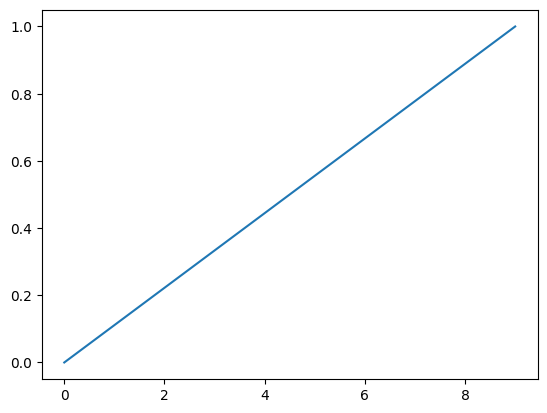

In [2]:
plt.plot(np.arange(0, 10, 1), np.linspace(0, 1, 10))
# plt.title("Test")
# plt.legend()

### Object-oriented

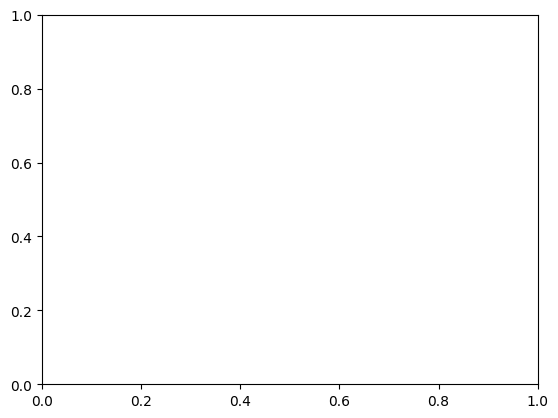

In [3]:
fig, ax = plt.subplots()

In [4]:
ax.plot(np.linspace(0, 1, 10), np.linspace(0, 10, 10))

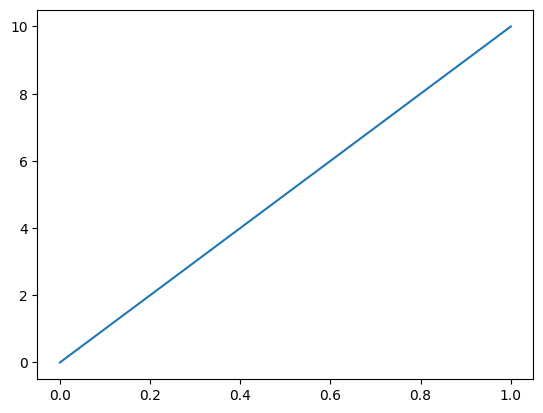

In [5]:
fig

## Switching back and forth

Text(0.5, 1.0, 'TEST')

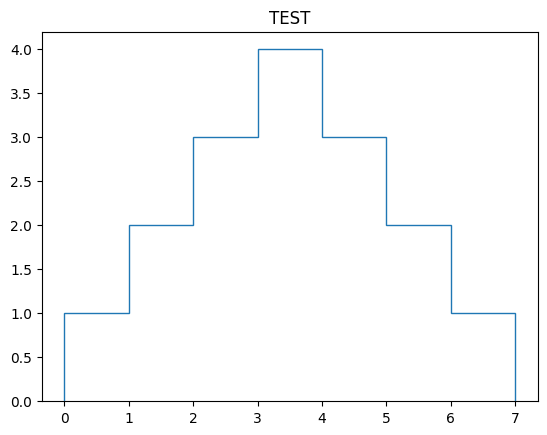

In [6]:
fig, ax = plt.subplots()
ax.stairs([1,2,3,4,3,2,1])
plt.title("TEST")

Text(0.5, 1.0, 'TEST')

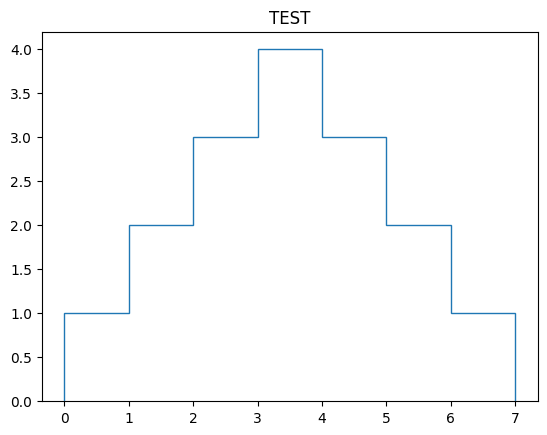

In [7]:
plt.stairs([1,2,3,4,3,2,1])
ax = plt.gca()
ax.set_title("TEST")

# Histogramming in matplotlib

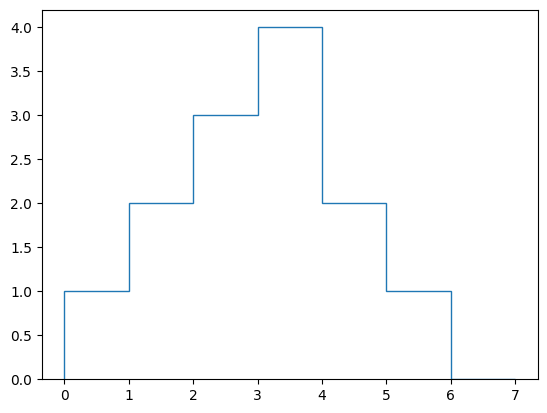

In [8]:
fig, ax = plt.subplots()
ax.stairs([1,2,3,4,2,1,0])

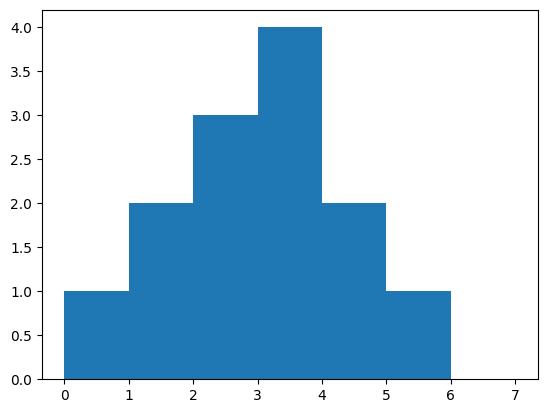

In [9]:
fig, ax = plt.subplots()
ax.stairs([1,2,3,4,2,1,0], baseline=0, fill=True)

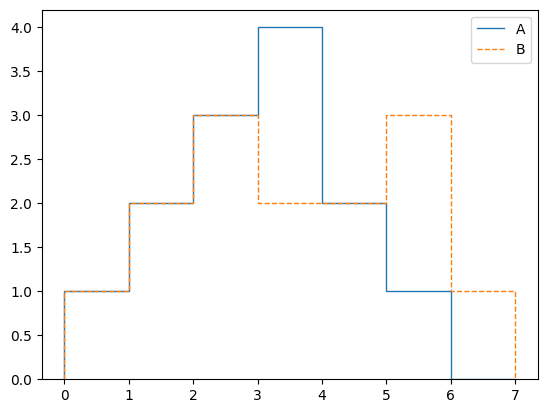

In [10]:
a, b = [1,2,3,4,2,1,0], [1,2,3,2,2,3,1]

fig, ax = plt.subplots()
ax.stairs(a, label="A")
ax.stairs(b, label='B', ls='--')
plt.legend()

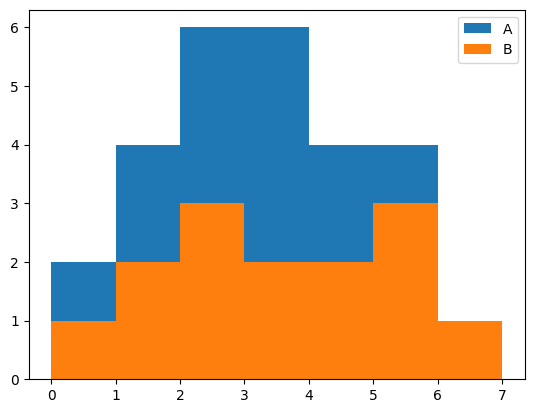

In [11]:
fig, ax = plt.subplots()
ax.stairs(np.sum([a,b], axis=0), baseline=b, fill=True, label="A")
ax.stairs(b, fill=True, label='B')
plt.legend()

## Other histogramming methods

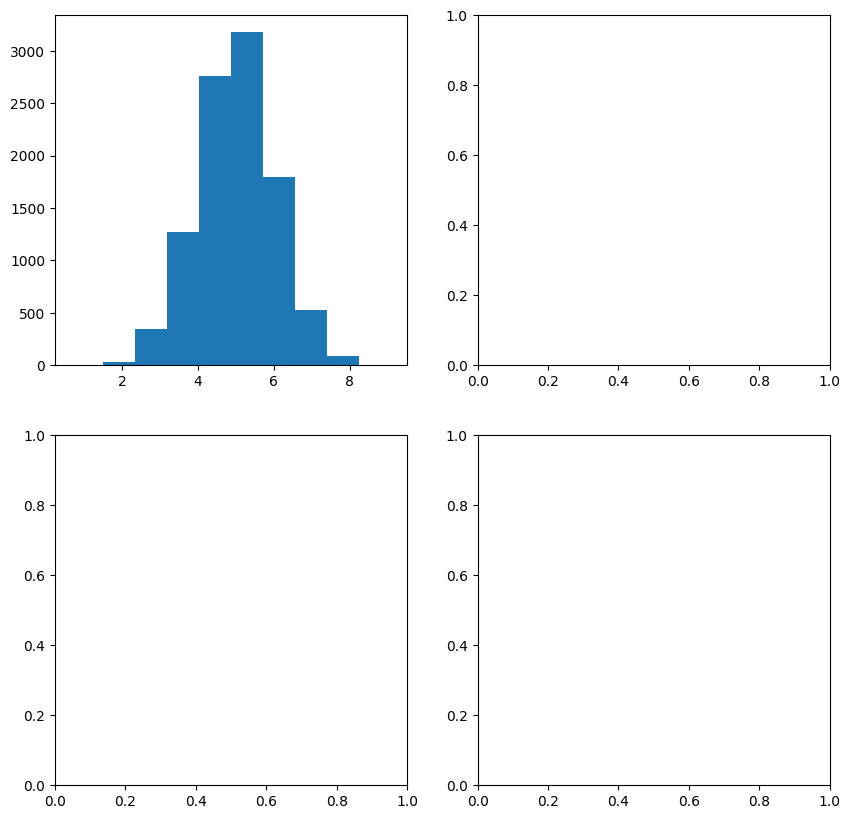

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

# in-situ np.histogram()
axs[0].hist(np.random.normal(5, 1, 10000));

# bar plots
# axs[1].bar([1,2,3], [2,3,4])  # (x-position), bin-value);

# step - skyline
# axs[2].step(np.arange(0, 5, 1), [2,3,4,2,1], where='post');

# filled
# axs[3].fill_between(np.arange(0, 5, 1), [2,3,4,2, 1], step='post');

# Better histogramming - mplhep

In [13]:
import mplhep as hep

In [14]:
yields, bins = np.histogram(np.random.normal(5, 1, 100000), bins=10)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcda33db910>, errorbar=None, legend_artist=None)]

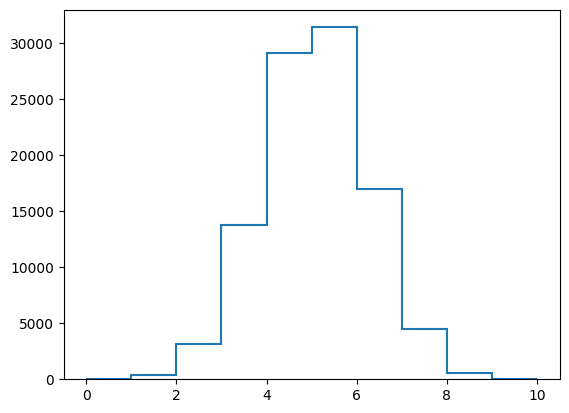

In [15]:
hep.histplot(yields)

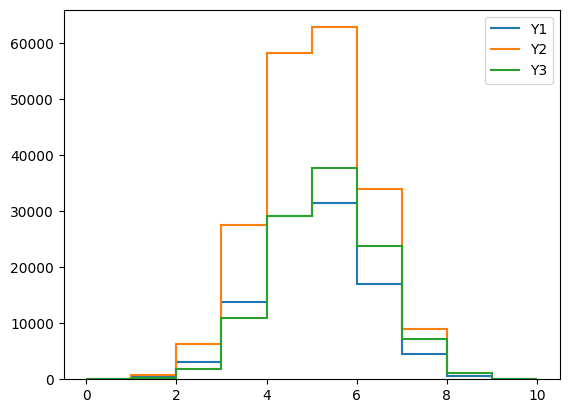

In [17]:
y1 = yields
y2 = yields*2
y3 = yields*np.linspace(0.2, 2, len(yields))

hep.histplot([y1, y2, y3], label=["Y1", "Y2", "Y3"]);
plt.legend()

# Better histogramming with hist

In [18]:
import hist

In [19]:
# histogram creation
h = hist.Hist(
    hist.axis.Regular(10, 0, 10, name="x", label="x-axis"),
#     hist.axis.Variable([0, 1, 2, 5, 10], name="y", label="y-axis"),
    hist.storage.Int64()
)
h

Hist(Regular(10, 0, 10, name='x', label='x-axis'), storage=Int64())

In [20]:
# basic filling
h.fill([1, 4, 6], 
#       [3, 5, 2]
      )
h

Hist(Regular(10, 0, 10, name='x', label='x-axis'), storage=Int64()) # Sum: 3.0

In [21]:
# Filling by names is possible for better bookkeeping:
h.fill(x=[1, 5, 5, 7], 
#        y=[3, 5, 2]
      )
h

Hist(Regular(10, 0, 10, name='x', label='x-axis'), storage=Int64()) # Sum: 7.0

In [22]:
# information access
h.values()

array([0, 2, 0, 0, 1, 2, 1, 1, 0, 0], dtype=int64)

In [23]:
h.axes[0]

Regular(10, 0, 10, name='x', label='x-axis')

In [24]:
h.axes[0].edges

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

## Quick hist creation

In [25]:
# histogram creation
h = hist.new.Regular(10, 0, 10, name="x", label="x-axis") \
    .Variable(range(10), name="y", label="y-axis") \
    .Int64().fill(*np.random.multivariate_normal([4, 6], [[2, 0], [0, 1]], 10000).T)
    
h

Hist(
  Regular(10, 0, 10, name='x', label='x-axis'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y', label='y-axis'),
  storage=Int64()) # Sum: 9968.0 (10000.0 with flow)

In [26]:
# even quicker
h = hist.new.Reg(10, 0, 10).Var(range(10)).Int64() \
#     .fill(*np.random.multivariate_normal([4, 6], [[2, 0], [0, 1]], 10000).T)
h

Hist(
  Regular(10, 0, 10, label='Axis 0'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label='Axis 1'),
  storage=Int64())

## Axis types 

In [27]:
axis0 = hist.axis.Regular(10, -5, 5, overflow=False, underflow=False, name="A")
# axis1 = hist.axis.Boolean(name="B")
axis2 = hist.axis.Variable(range(10), name="C")
# axis3 = hist.axis.Integer(-5, 5, overflow=False, underflow=False, name="D")
axis4 = hist.axis.IntCategory(range(10), name="E")
axis5 = hist.axis.StrCategory(["T", "F"], name="F")

In [28]:
# Growth!
h = hist.new.Reg(10, 0, 10).StrCat([], growth=True).Weight()
h.fill(np.random.normal(5, 2, 1000), "A")
h.fill(np.random.normal(7, 2, 1000), "B")

Hist(
  Regular(10, 0, 10, label='Axis 0'),
  StrCategory(['A', 'B'], growth=True, label='Axis 1'),
  storage=Weight()) # Sum: WeightedSum(value=1922, variance=1922) (WeightedSum(value=2000, variance=2000) with flow)

## Storage types

A number of possible storage type exist: `Double`, `Unlimited`, `Int64`, `AutomicInt64`, `Weight`, `Mean`, and `WeightedMean`.

In practice you will always use `Weight()`

In [29]:
hist.new.Reg(10, 0, 10).Weight().fill([1,2,3,5], weight=[1,1,1,0.5])

Hist(Regular(10, 0, 10, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=3.5, variance=3.25)

In [30]:
hist.new.Reg(10, 0, 10).Weight().fill([1,2,3,5])

Hist(Regular(10, 0, 10, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=4, variance=4)

## Hist manipulation and UHI

https://hist.readthedocs.io/en/latest/user-guide

Yes, we've had one documentation, but what about another one...

https://uhi.readthedocs.io/en/latest/

In [31]:
# example histogram
h = hist.new.Reg(10, 0, 10, name="x") \
    .Var(range(10), name="y") \
    .Var(range(10), name="z") \
    .Weight().fill(*np.random.multivariate_normal([4, 6, 4], np.eye(3), 100000).T)
    
h

Hist(
  Regular(10, 0, 10, name='x'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='z'),
  storage=Weight()) # Sum: WeightedSum(value=99869, variance=99869) (WeightedSum(value=100000, variance=100000) with flow)

In [32]:
# Project on an axis
h.project("x")

Hist(Regular(10, 0, 10, name='x'), storage=Weight()) # Sum: WeightedSum(value=99997, variance=99997) (WeightedSum(value=100000, variance=100000) with flow)

In [33]:
# Slicing (applying cuts)
h[5:, :, sum]

Hist(
  Regular(5, 5, 10, name='x'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y'),
  storage=Weight()) # Sum: WeightedSum(value=15916, variance=15916) (WeightedSum(value=100000, variance=100000) with flow)

In [34]:
# Indexing by bin vs value
h[5:, 5j:, sum]

Hist(
  Regular(5, 5, 10, name='x'),
  Variable([5, 6, 7, 8, 9], name='y'),
  storage=Weight()) # Sum: WeightedSum(value=13413, variance=13413) (WeightedSum(value=100000, variance=100000) with flow)

In [35]:
# Dictionary access
h[{"y": 5, "z": sum}]

Hist(Regular(10, 0, 10, name='x'), storage=Weight()) # Sum: WeightedSum(value=33868, variance=33868)

In [36]:
# More robust slicing and  
s = hist.tag.Slicer()
s

In [37]:
h[{"z": sum, "y": s[:hist.loc(5):hist.sum]}]

Hist(Regular(10, 0, 10, name='x'), storage=Weight()) # Sum: WeightedSum(value=15862, variance=15862)

## Mind the flow bins!

In [38]:
h[sum, sum, :].values()

array([1.2900e+02, 2.1820e+03, 1.3456e+04, 3.4222e+04, 3.4279e+04,
       1.3439e+04, 2.1550e+03, 1.3400e+02, 4.0000e+00])

In [39]:
h[sum, sum, :].values(flow=True)

array([0.0000e+00, 1.2900e+02, 2.1820e+03, 1.3456e+04, 3.4222e+04,
       3.4279e+04, 1.3439e+04, 2.1550e+03, 1.3400e+02, 4.0000e+00,
       0.0000e+00])

In [40]:
h[sum, 0:len:sum, :].values(flow=True)

array([0.0000e+00, 1.2900e+02, 2.1780e+03, 1.3441e+04, 3.4172e+04,
       3.4239e+04, 1.3423e+04, 2.1520e+03, 1.3400e+02, 4.0000e+00,
       0.0000e+00])

In [41]:
h[sum, sum, :].values(flow=True) - h[sum, 0:len:sum, :].values(flow=True)

array([ 0.,  0.,  4., 15., 50., 40., 16.,  3.,  0.,  0.,  0.])

In [44]:
# Doesn't work in dict-access
# h[{0: 0:len:sum}] 

In [46]:
# Meanwhile slicer allows this syntax in dict-access
h[{0: s[0:len:sum]}]

Hist(
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='z'),
  storage=Weight()) # Sum: WeightedSum(value=99869, variance=99869) (WeightedSum(value=99997, variance=99997) with flow)

In [48]:
# If you know you won't need them, you can skip flow bins
hist.new.Reg(10, 0, 10, flow=False).Weight()

Hist(Regular(10, 0, 10, underflow=False, overflow=False, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0)